

*   Antonio Marcio Crepaldi Junior 21012485
*   Rafael Vedoato Lett 21000375




In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import pandas as pd

# Leitura do CSV com o delimitador correto
df = pd.read_csv('Hortifruti.csv', sep=';')

# Verificação das primeiras linhas do DataFrame
print(df.head())
print(df.columns)


   semana_mes  banana  laranja  maca
0           1    1000     1700  2400
1           2    1100     1200  1200
2           3    1500     1000   500
3           4     700      600   700
4           1    2000     3500  4700
Index(['semana_mes', 'banana', 'laranja', 'maca'], dtype='object')


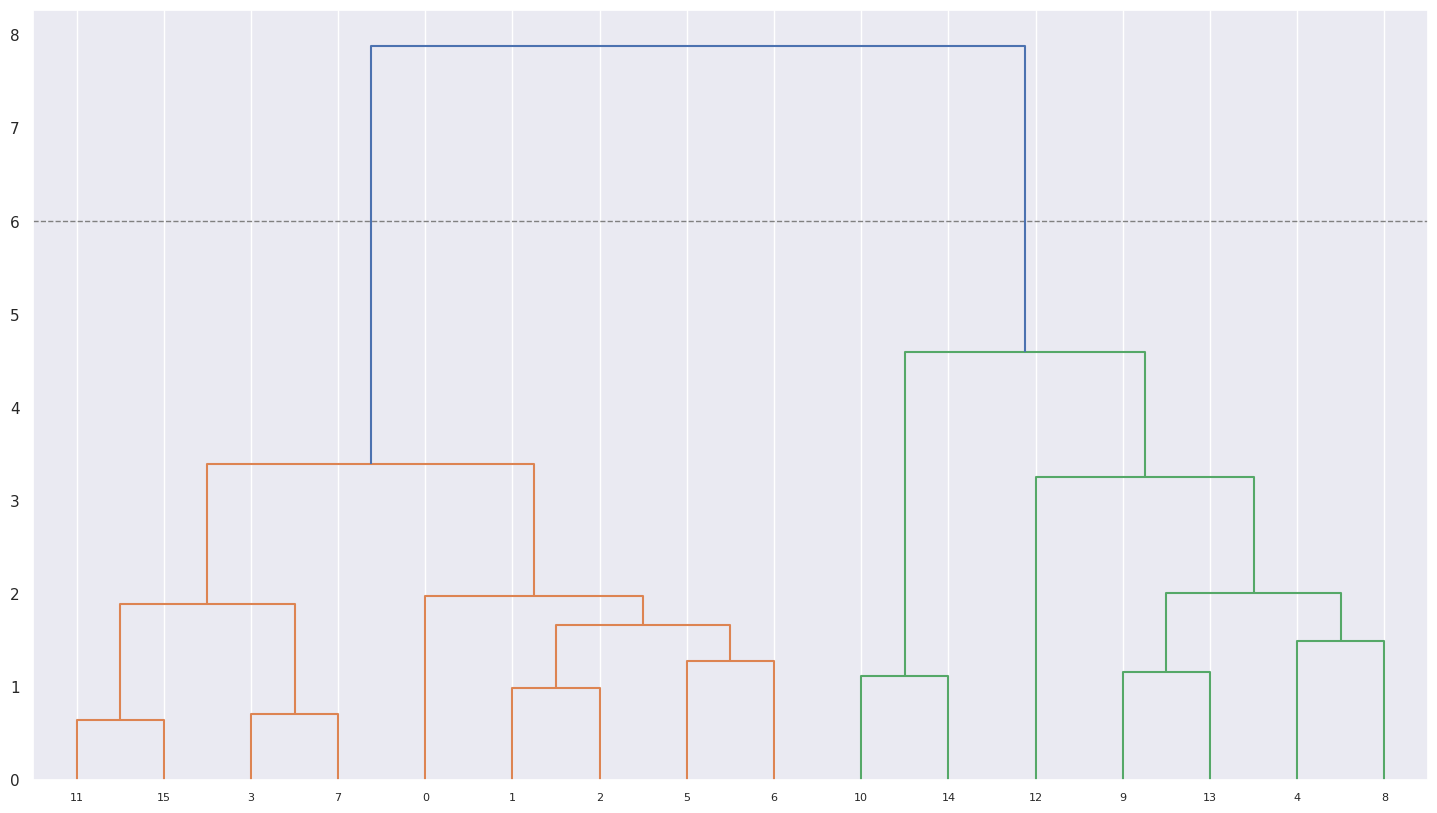

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
import geopandas

import warnings
warnings.filterwarnings('ignore')

sns.set()
df_scaled = df.copy()
df_scaled.iloc[:, :] = StandardScaler().fit_transform(df)

df_scaled.iloc[:, :] = StandardScaler().fit_transform(df)
Z = hierarchy.linkage(df_scaled, 'ward')
plt.figure(figsize=(18, 10))
plt.axhline(y=6,c='grey',lw=1,linestyle='dashed')
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(df.index), leaf_font_size=8)

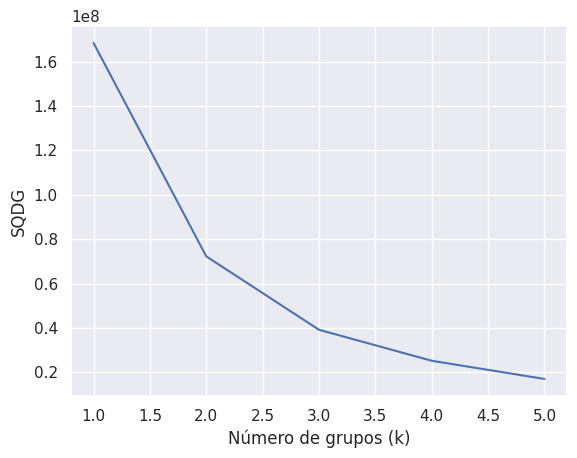

In [46]:
# SQDG
SQDG = {}
for k in range(1,6):
  kmeans=KMeans(n_clusters=k, max_iter=1000).fit(df)
  df['grupo']=kmeans.labels_
  SQDG[k]= kmeans.inertia_  # Inertia: soma das distâncias das observações ao centro mais próximo
plt.figure
plt.plot(list(SQDG.keys()),list(SQDG.values()))
plt.xlabel('Número de grupos (k)')
plt.ylabel('SQDG');
plt.show()

In [47]:
# redefinindo X
X = df

In [48]:
# número de grupos sugerido pelo dendrograma
k=3

In [49]:
kmeans=KMeans(n_clusters=k,random_state=10).fit(X)

In [50]:
# incluir no Dataframe de dados as informações sobre a qual grupo cada pessoa pertence
df['grupo']=kmeans.labels_
df

,semana_mes,banana,laranja,maca,grupo
0,1,1000,1700,2400,1
1,2,1100,1200,1200,1
2,3,1500,1000,500,1
3,4,700,600,700,1
4,1,2000,3500,4700,0
5,2,2200,2300,2700,1
6,3,3000,1900,1100,1
7,4,1400,1300,1400,1
8,1,3000,5000,7000,2
9,2,3300,3500,4000,0


In [51]:
#média dos grupos - todas as variáveis
# inclusive as não utilizadas para agrupar
df.groupby('grupo').mean()

,semana_mes,banana,laranja,maca
grupo,,,,
0,2.500,3800.0,3533.333333,3383.333333
1,2.875,1625.0,1487.500000,1500.000000
2,1.000,3500.0,6000.000000,8250.000000


In [52]:
#mediana das variáveis para cada grupo
df.groupby('grupo').median()

,semana_mes,banana,laranja,maca
grupo,,,,
0,2.5,3850.0,3500.0,3400.0
1,3.0,1450.0,1500.0,1300.0
2,1.0,3500.0,6000.0,8250.0


#Q2
Na primeira semana do mes, existem mais vendas de maça, Na segunda semana as vendas começam a diminuir e as frutas ficam mais proximas. Na terceira semana as vendas ficam igualmente menores, demonstrando uma diminuição de venda durante o passar do mes